In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
df = pandas.read_csv("../data/bbtop15-lyrics-exploring-tokenized.csv")

#drop rows where the text is missing.
df = df.dropna(subset=['lyrics'])

#view the dataframe
df

,track_id,track,artist,artist_gender,date,year,lyrics,lyrics_clean,tokens,tokens_clean,tokens_clean_lower,tokens_clean_lower_stopfree
0,0,Me So Horny,The 2 Live Crew,Male,1989-11-04,1989,"\n\n[Intro]\n""What'll we get for 10 dollars?""\...","\n\n\n""Whatll we get for 10 dollars?""\n""Every ...","[""''"", 'Whatll', 'we', 'get', 'for', '10', 'do...","['Whatll', 'we', 'get', 'for', '10', 'dollars'...","['whatll', 'we', 'get', 'for', '10', 'dollars'...","['whatll', 'get', '10', 'dollars', 'every', 't..."
1,1,Bust A Move,Young M.C.,Male,1989-11-04,1989,\n\n[Intro]\nBust it\n\n[Verse 1]\nThis here's...,\n\n\nBust it\n\n\nThis heres a jam for all th...,"['Bust', 'it', 'This', 'heres', 'a', 'jam', 'f...","['Bust', 'it', 'This', 'heres', 'a', 'jam', 'f...","['bust', 'it', 'this', 'heres', 'a', 'jam', 'f...","['bust', 'heres', 'jam', 'fellas', 'tryin', 'l..."
2,2,Smooth Operator,Big Daddy Kane,Male,1989-11-04,1989,"\n\n[Verse 1]\nWell excuse me, take a few minu...","\n\n\nWell excuse me, take a few minutes, to m...","['Well', 'excuse', 'me', ',', 'take', 'a', 'fe...","['Well', 'excuse', 'me', 'take', 'a', 'few', '...","['well', 'excuse', 'me', 'take', 'a', 'few', '...","['well', 'excuse', 'take', 'minutes', 'mellow'..."
3,3,Cha Cha Cha,MC Lyte,Female,1989-11-04,1989,\n\n[Kick this one here for me and my DJ]\n\nY...,\n\n\n\nYou can cha-cha-cha to this Mardis Gra...,"['You', 'can', 'cha-cha-cha', 'to', 'this', 'M...","['You', 'can', 'chachacha', 'to', 'this', 'Mar...","['you', 'can', 'chachacha', 'to', 'this', 'mar...","['chachacha', 'mardis', 'gras', 'im', 'dopest'..."
4,4,I Go To Work,Kool Moe Dee,Male,1989-11-04,1989,\n\n[Verse 1]\nI go to work like a doctor\nWhe...,\n\n\nI go to work like a doctor\nWhen I rock ...,"['I', 'go', 'to', 'work', 'like', 'a', 'doctor...","['I', 'go', 'to', 'work', 'like', 'a', 'doctor...","['i', 'go', 'to', 'work', 'like', 'a', 'doctor...","['go', 'work', 'like', 'doctor', 'rock', 'mic'..."
5,5,New Jack Swing,Wreckx-N-Effect,Male,1989-11-04,1989,"\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","['Yo', 'Wreckx-N-Effect', 'In', 'full', 'effec...","['Yo', 'WreckxNEffect', 'In', 'full', 'effect'...","['yo', 'wreckxneffect', 'in', 'full', 'effect'...","['yo', 'wreckxneffect', 'full', 'effect', 'wor..."
6,6,They Put Me In The Mix,M.C. Hammer,Male,1989-11-04,1989,\n\n[Hammer]\nYo! My Lone Mixer\nYou ready?\nB...,\n\n\nYo! My Lone Mixer\nYou ready?\nBust it!\...,"['Yo', '!', 'My', 'Lone', 'Mixer', 'You', 'rea...","['Yo', 'My', 'Lone', 'Mixer', 'You', 'ready', ...","['yo', 'my', 'lone', 'mixer', 'you', 'ready', ...","['yo', 'lone', 'mixer', 'ready', 'bust', 'lone..."
7,7,Just A Friend,Biz Markie,Male,1989-11-04,1989,\n\n[Intro]\nHave you ever met a girl that you...,\n\n\nHave you ever met a girl that you tried ...,"['Have', 'you', 'ever', 'met', 'a', 'girl', 't...","['Have', 'you', 'ever', 'met', 'a', 'girl', 't...","['have', 'you', 'ever', 'met', 'a', 'girl', 't...","['ever', 'met', 'girl', 'tried', 'date', 'year..."
8,8,It's Funky Enough,The D.O.C.,Male,1989-11-04,1989,\n\n[Intro]\nY'all ready for this\nRastafara S...,\n\n\nYall ready for this\nRastafara Sonna Mad...,"['Yall', 'ready', 'for', 'this', 'Rastafara', ...","['Yall', 'ready', 'for', 'this', 'Rastafara', ...","['yall', 'ready', 'for', 'this', 'rastafara', ...","['yall', 'ready', 'rastafara', 'sonna', 'madda..."
9,9,Somebody For Me,Heavy D & The Boyz,Male,1989-11-04,1989,\n\nOh yeah..\n\nLove somebo-dy...\n\n(Al B. S...,\n\nOh yeah..\n\nLove somebo-dy...\n\n(Al B. S...,"['Oh', 'yeah..', 'Love', 'somebo-dy', '...', '...","['Oh', 'yeah', 'Love', 'somebody', 'Al', 'B', ...","['oh', 'yeah', 'love', 'somebody', 'al', 'b', ...","['oh', 'yeah', 'love', 'somebody', 'al', 'b', ..."


In [6]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.80, min_df=50,
                                max_features=None,
                                stop_words='english'
                                )

dtm = vectorizer.fit_transform(df.lyrics_clean)

vocab = vectorizer.get_feature_names()  # a list
dtm

<2317x1404 sparse matrix of type '<class 'numpy.int64'>'
	with 246336 stored elements in Compressed Sparse Row format>

In [7]:
dtm = dtm.toarray()  # convert to a regular, dense array
vocab = np.array(vocab)
dtm


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
"Get track, names"
tracks = df.track.tolist()

In [11]:
from sklearn.metrics.pairwise import euclidean_distances
euc_dist = euclidean_distances(dtm)
print(tracks[1])
print(tracks[2])
print("\nDistance between track 1 and track2:")
# the distance between Austen and Machiavelli
print(euc_dist[1, 2])

# which is greater than the distance between *Austen* and *Alcott* (index 0)
print("\nDistance between track 1 and track 2 is greater than the distance between track 1 and track 0:")
euc_dist[1, 2] > euc_dist[0, 1]

Bust A Move
Smooth Operator

Distance between track 1 and track2:
30.1330383466

Distance between track 1 and track 2 is greater than the distance between track 1 and track 0:


True

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

cos_dist = 1 - cosine_similarity(dtm)

np.round(cos_dist, 2)

array([[ 0.  ,  0.69,  0.75, ...,  0.88,  0.87,  0.85],
       [ 0.69,  0.  ,  0.79, ...,  0.87,  0.86,  0.85],
       [ 0.75,  0.79,  0.  , ...,  0.86,  0.86,  0.81],
       ..., 
       [ 0.88,  0.87,  0.86, ...,  0.  ,  0.77,  0.92],
       [ 0.87,  0.86,  0.86, ...,  0.77, -0.  ,  0.82],
       [ 0.85,  0.85,  0.81, ...,  0.92,  0.82, -0.  ]])

In [17]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(euc_dist)  # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]

# short versions of filenames:
# convert 'data/austen-brontë/Austen_Emma.txt' to 'Austen_Emma'
names = tracks


#for x, y, name in zip(xs, ys, names):
 #   plt.scatter(x, y)
#    plt.text(x, y, name)

#plt.show()

In [18]:
print(len(xs))

print(len(ys))
print(len(names))

2317
2317
2317


In [37]:
import string
table = str.maketrans('', '', string.punctuation)

def clean_track_title(track):
    return track.translate(table).lower().replace(' ', '')

In [38]:
names = [clean_track_title(track) for track in names]
print(names[:100])

['mesohorny', 'bustamove', 'smoothoperator', 'chachacha', 'igotowork', 'newjackswing', 'theyputmeinthemix', 'justafriend', 'itsfunkyenough', 'somebodyforme', 'saynogo', 'lethalweapon', 'glamorouslife', 'therhythm', 'youmustlearn', 'steppinintotheam', 'pause', 'fightthepower', 'beepers', 'expressyourself', 'sowatchasayin', 'ithinkicanbeatmiket', 'fbi', 'turnitout', 'principalsoffice', 'expression', 'igetthejobdone', 'buddy', 'welcometotheterrordome', 'ladiesfirst', 'thegasface', 'thehumptydance', 'gyrlztheyloveme', 'cmonbabe', 'positivity', 'payyadues', 'jinglingbaby', 'letyourbackboneslide', 'somebodyfarted', 'murderrap', 'helpthechildren', 'stoplooklisten', 'funhouse', 'pawnsinthegame', 'theformula', 'ileftmywalletinelsegundo', 'juicygotchacrazy', 'thefunkshop', 'dancinmachine', '911isajoke', 'bgirls', 'funkyforyou', 'myhooptie', 'comeintomyhouse', 'raisetheflag', 'amerikkkasmostwanted', 'ucanttouchthis', 'whatuwaitin4', 'fame90', 'lettherhythmhitem', 'mentirosa', 'ownleeeue', 'onetim

In [39]:
for x, y, name in zip(xs, ys, names):
    plt.scatter(x, y)
    plt.text(x, y, name)



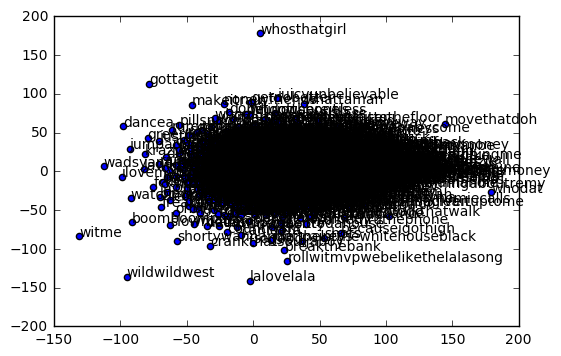

In [40]:
plt.show()